# Loan Application Status Prediction

### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From above we see that there are total of 614 rows and 13 columns from which the Loan_Status column will be our target variable 

In [3]:
#getting data of top 5 column
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#getting data of bottom 5 column
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

## Data preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see that there are some null values present so we will treat the null values first 
we will use mode method on object datatype and median on float datatype

In [8]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## checking null values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there is missing/null values available in dataset

<AxesSubplot:>

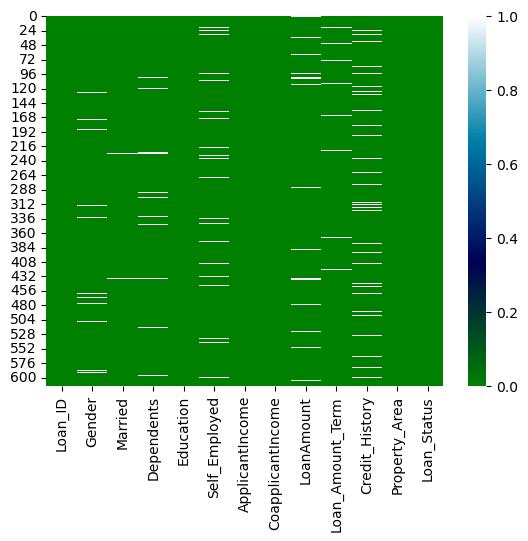

In [10]:
sns.heatmap(df.isnull(),cmap='ocean')

heatmap visually defines there is null value present in the dataset 

<AxesSubplot:>

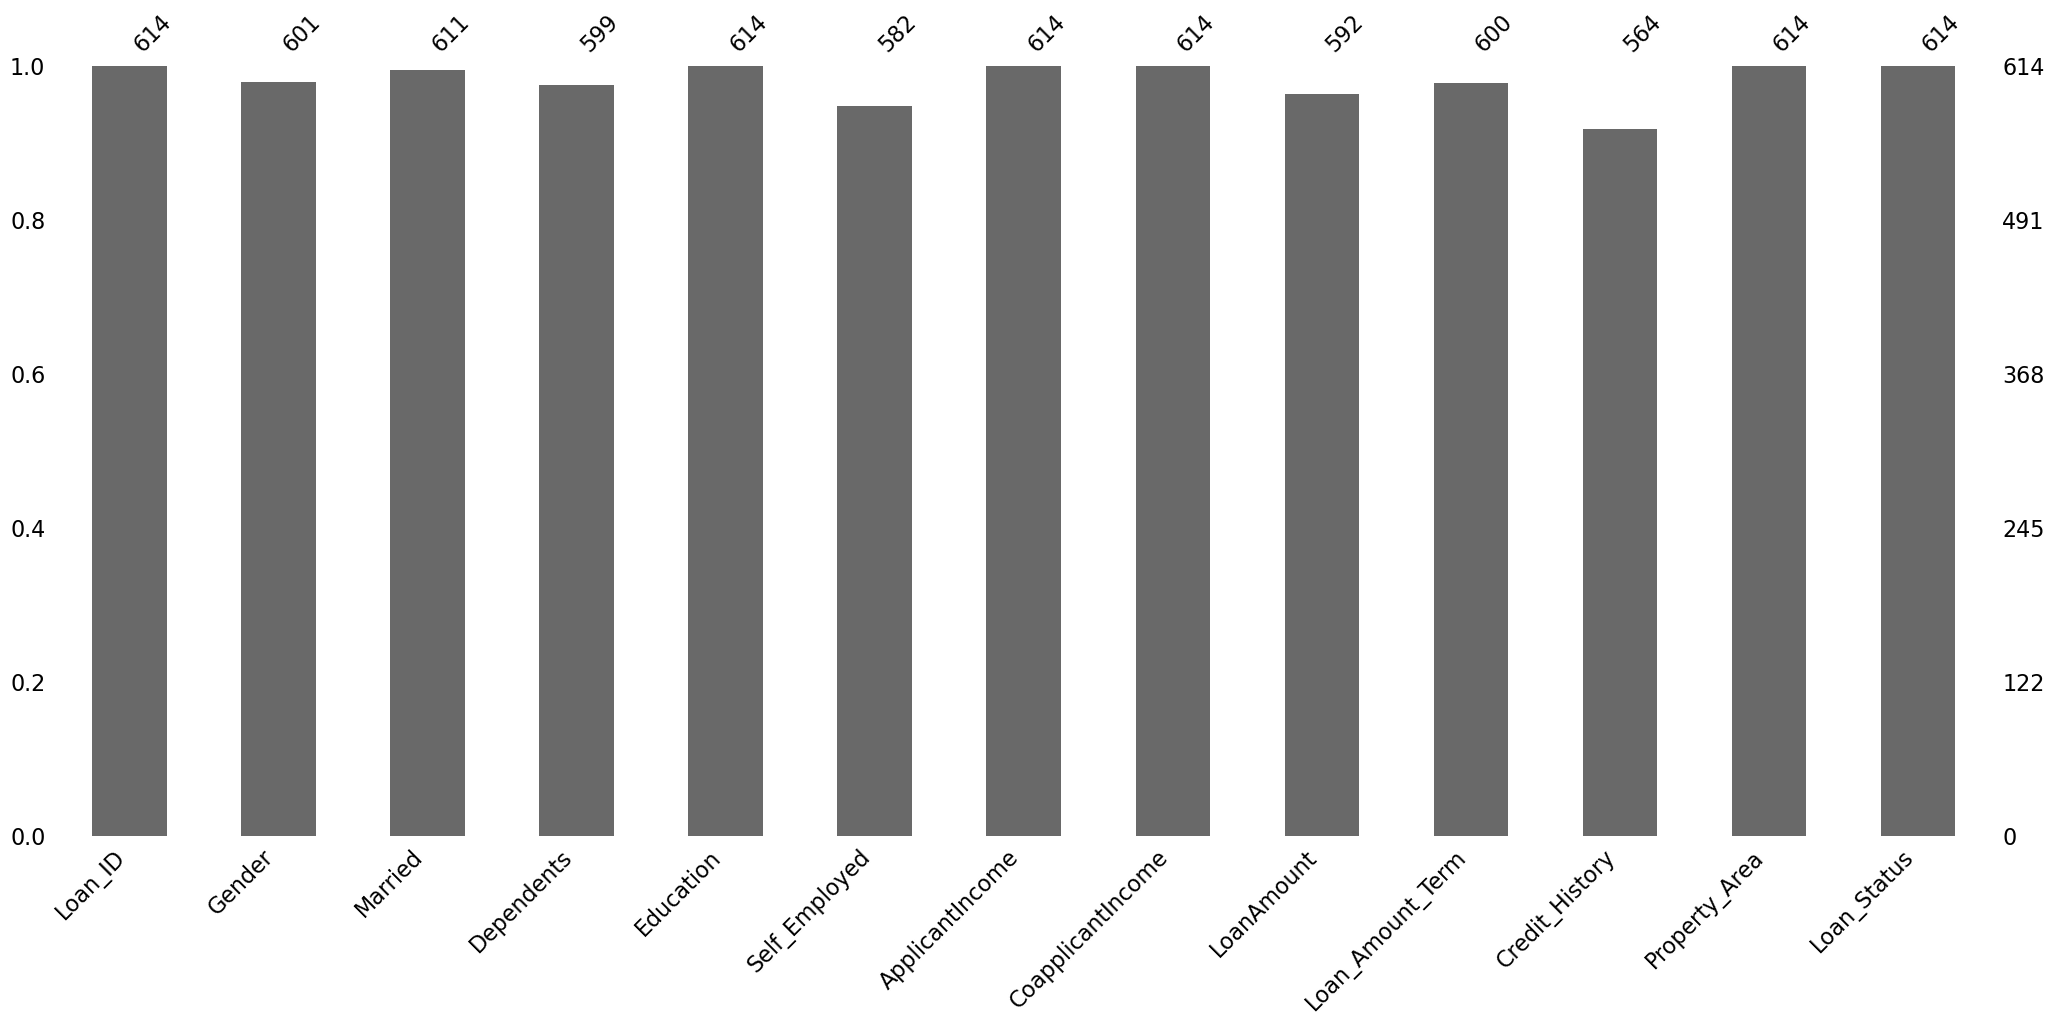

In [11]:
ms.bar(df)

bar chart for missing value

<AxesSubplot:>

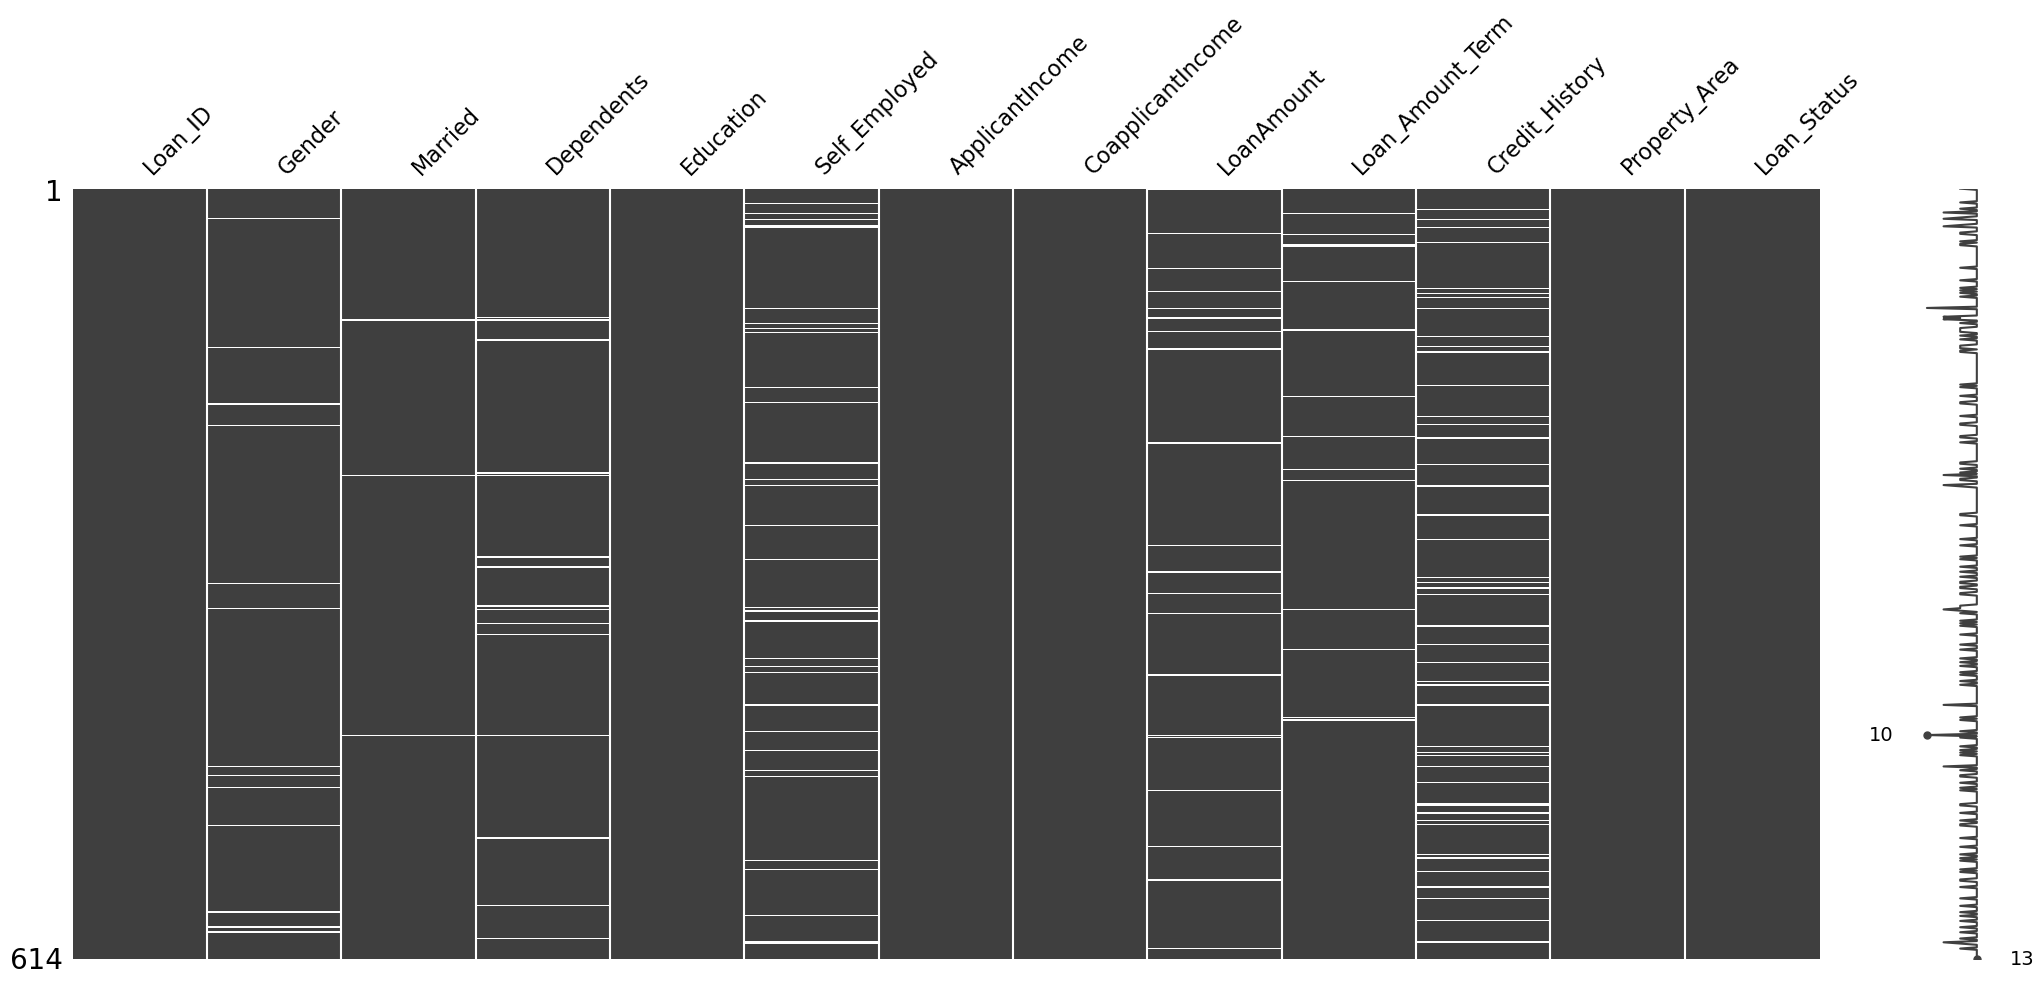

In [12]:
ms.matrix(df)

## Removing null values

In [13]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null values present in the dataset

## find duplicate values

In [15]:
df.duplicated().sum()

0

there is no duplicated value present in the data set

In [16]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

From above we can see that many of the columns has low unique values and hence can be termed as classified columns. Our target variable 'Loan_Status" has only two values so we can say this is a case of classification problem.

df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True)

In [17]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## seperate the data columns

In [18]:
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
print("categorial columns:",categorial_data)
print("\n")

Numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object":
        Numerical_data.append(i)
print("Numerical columns:",Numerical_data)
print("\n")
print("No.of Numerical column:")
print(len(Numerical_data))


categorial columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


No.of Numerical column:
5


In [19]:
# Describe function for integer datatype
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


<font size=5>**Visualization**

Y    422
N    192
Name: Loan_Status, dtype: int64


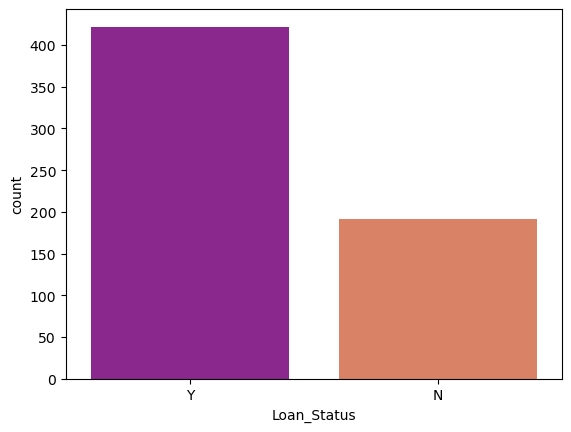

In [21]:
print(df["Loan_Status"].value_counts())
sns.countplot(x='Loan_Status', data=df, palette="plasma")
plt.show()

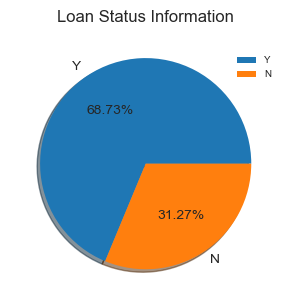

In [22]:
plt.style.use('seaborn-white')
plt.figure(figsize=(3,3))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

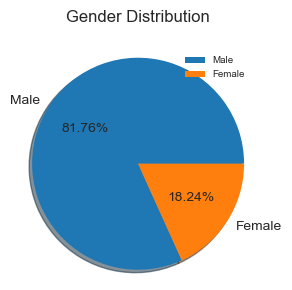

In [23]:
plt.figure(figsize=(3,3))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

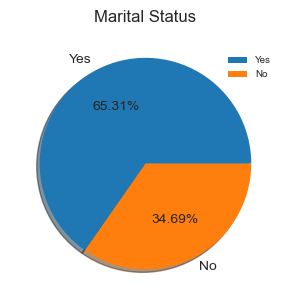

In [24]:
plt.figure(figsize=(3,3))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

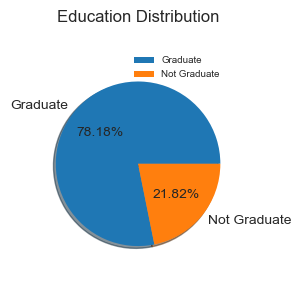

In [25]:
plt.figure(figsize=(3,3))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

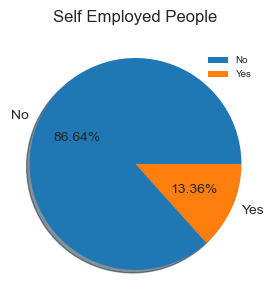

In [26]:
plt.figure(figsize=(3,3))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

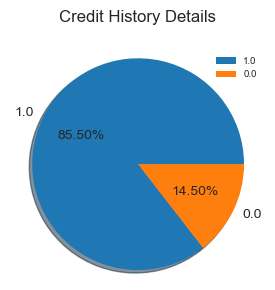

In [27]:
plt.figure(figsize=(3,3))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

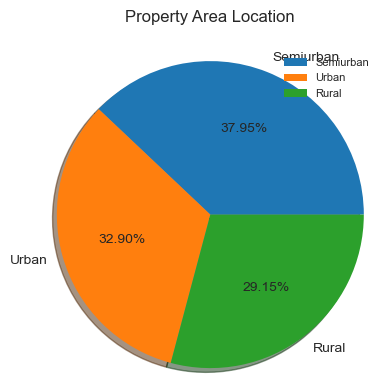

In [28]:
plt.figure(figsize=(4,4))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':8})
plt.axis('equal')
plt.tight_layout()
plt.show()

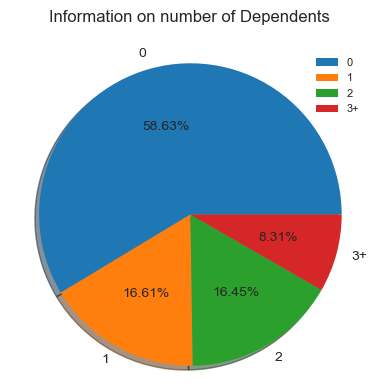

In [29]:
plt.figure(figsize=(4,4))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':8})
plt.axis('equal')
plt.tight_layout()
plt.show()

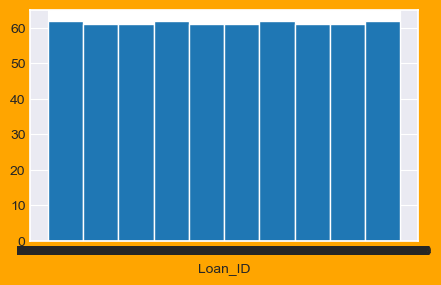

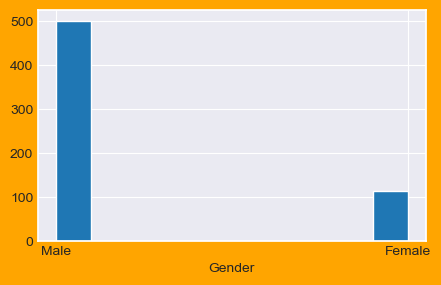

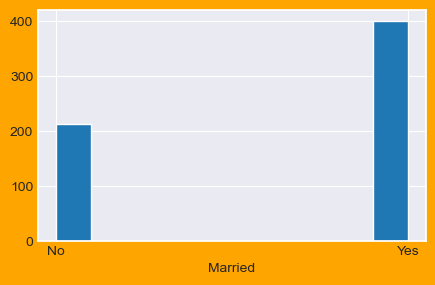

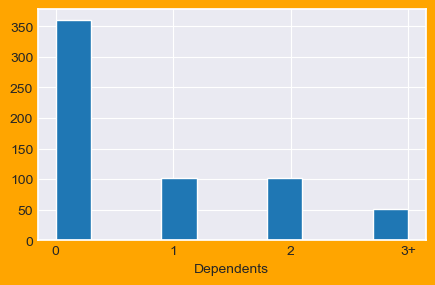

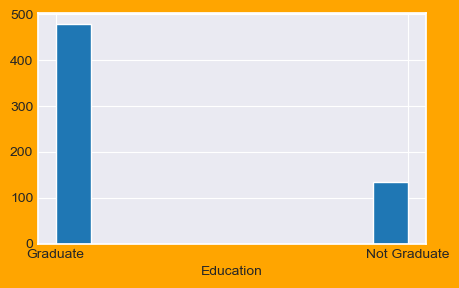

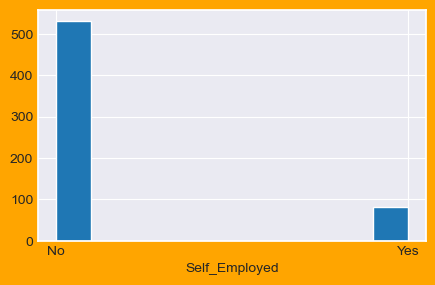

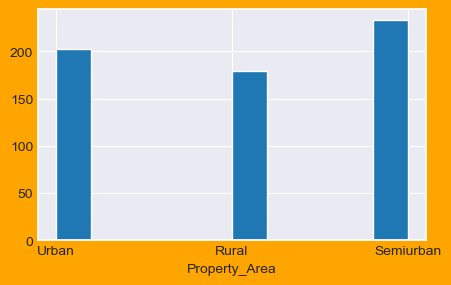

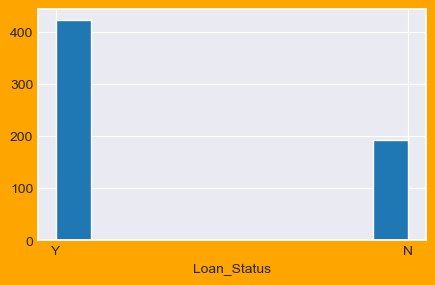

In [30]:
sns.set_style('darkgrid')
for i in categorial_data:
    plt.figure(figsize=(5,3),facecolor='orange')
    plt.hist(df[i],bins=10)
    plt.xlabel(i)
    plt.show()

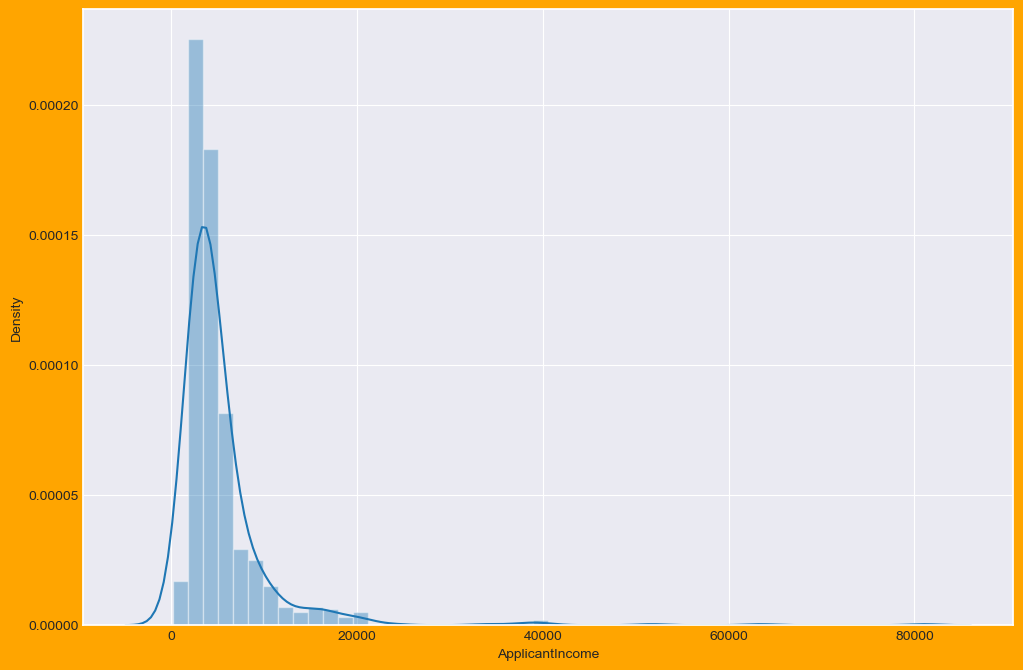

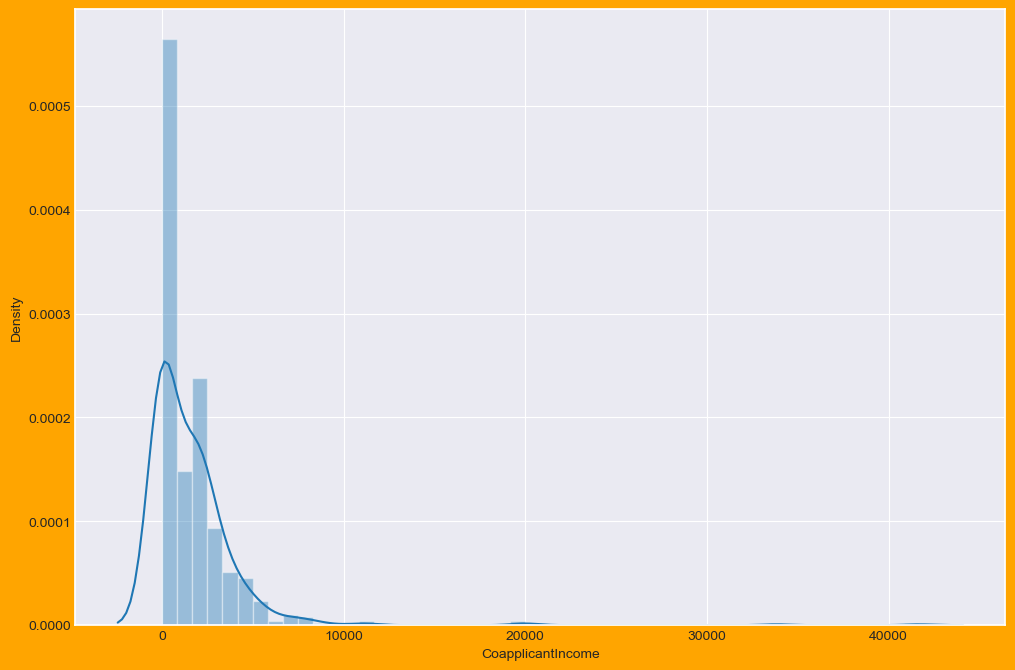

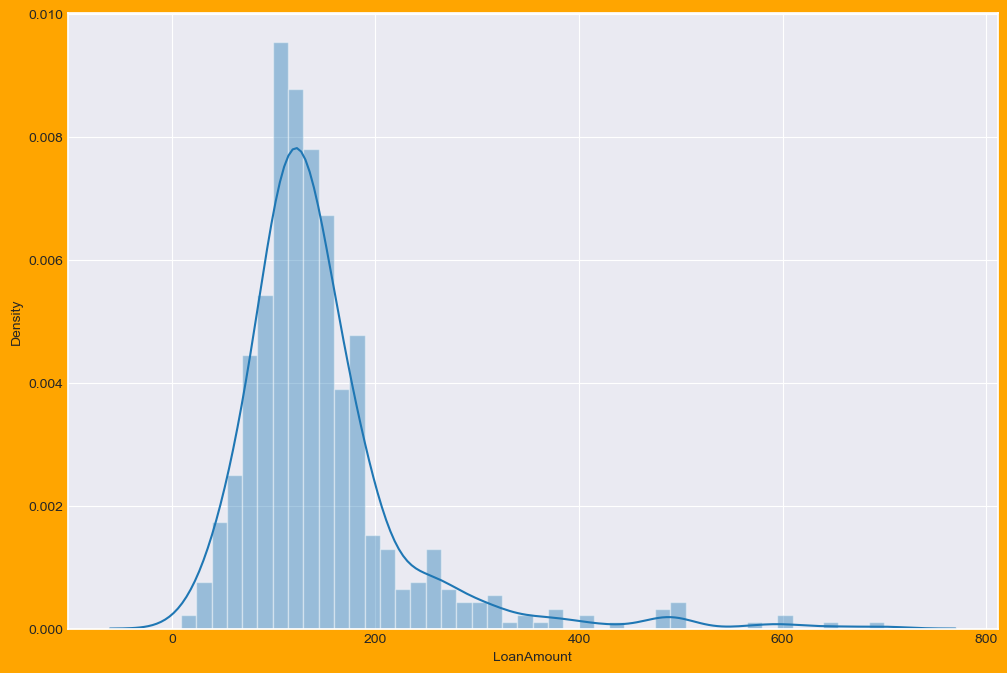

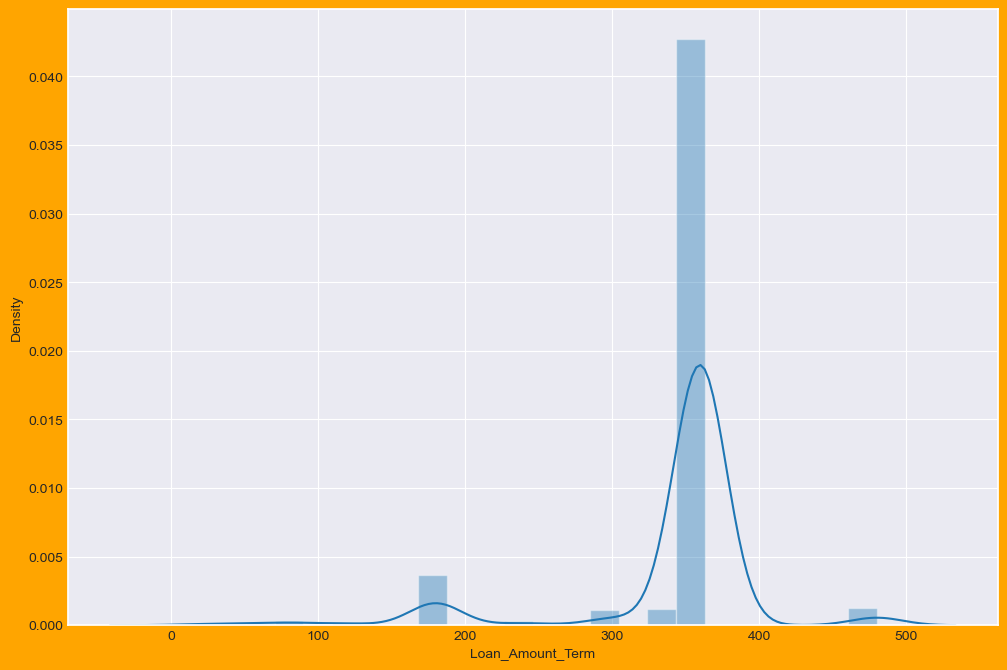

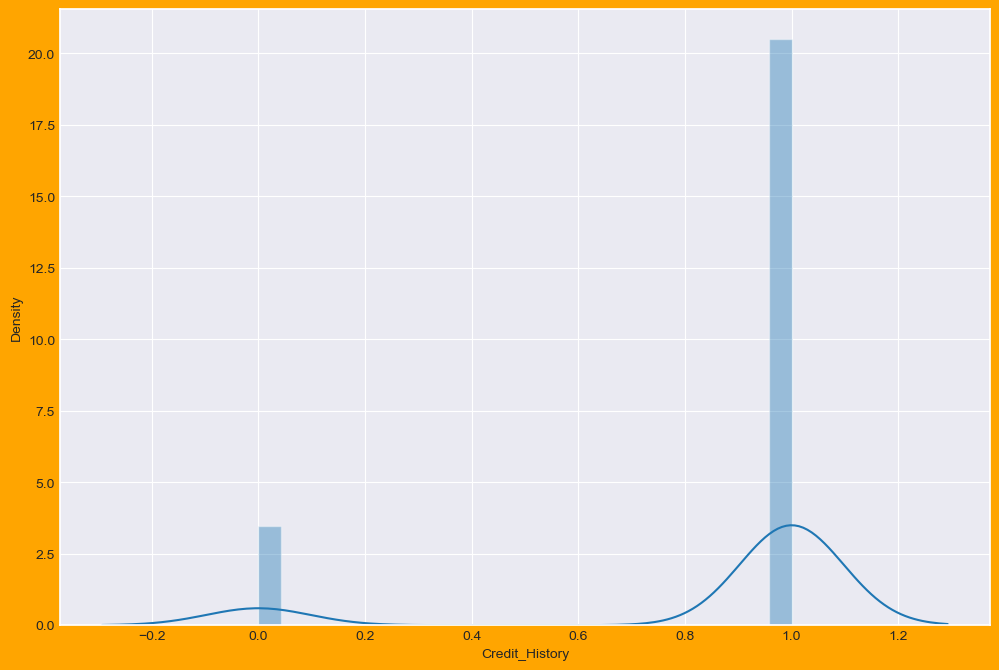

In [31]:
for i in Numerical_data:
    plt.figure(figsize=(12,8),facecolor='orange')
    sns.distplot(df[i])
    plt.show()

In [32]:
rating_cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

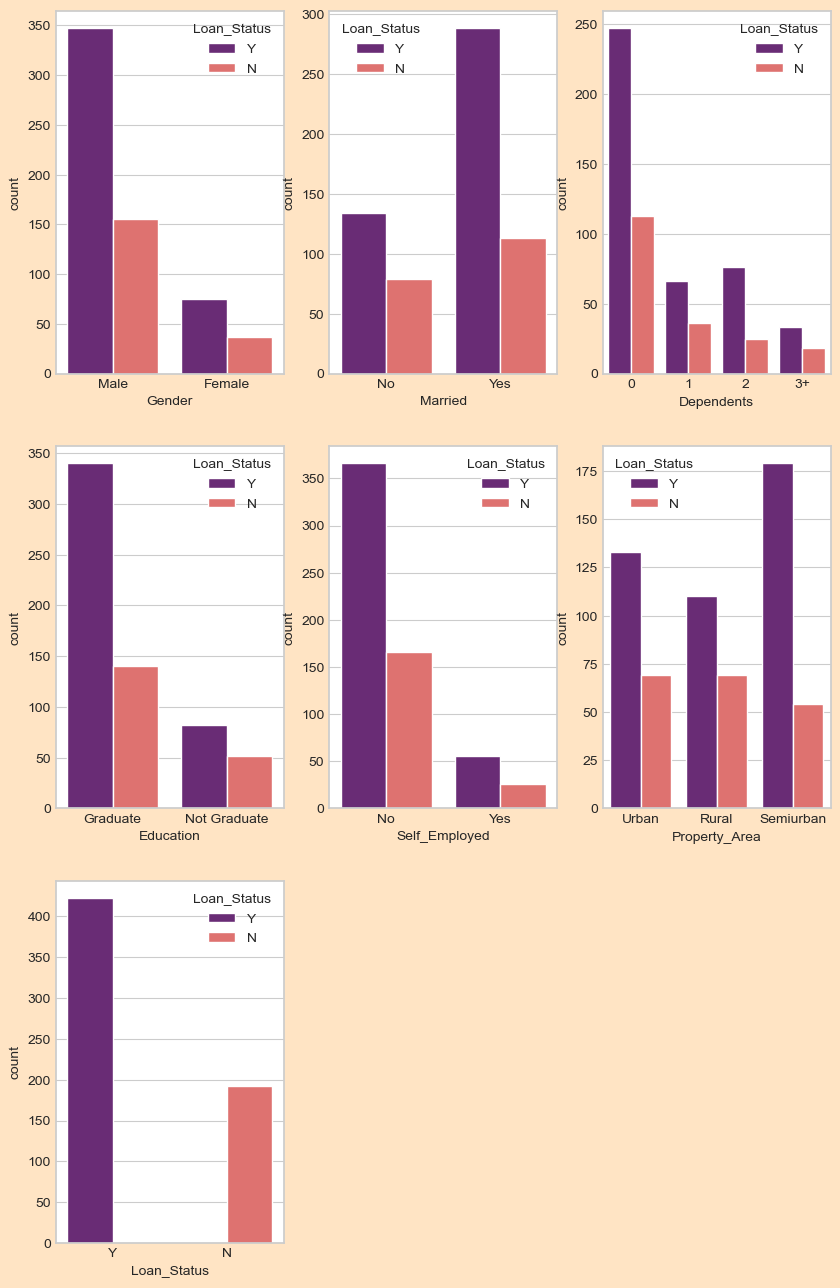

In [33]:
sns.set_style('whitegrid')
plt.figure(facecolor='bisque',figsize=(10,16))
p=1
for i in rating_cat_cols:
    if p<=8:
        ax=plt.subplot(3,3,p)
        sns.countplot(x=i,data=df,hue='Loan_Status',palette='magma')
    p+=1

## Multivariate Analysis

### Pair Plot

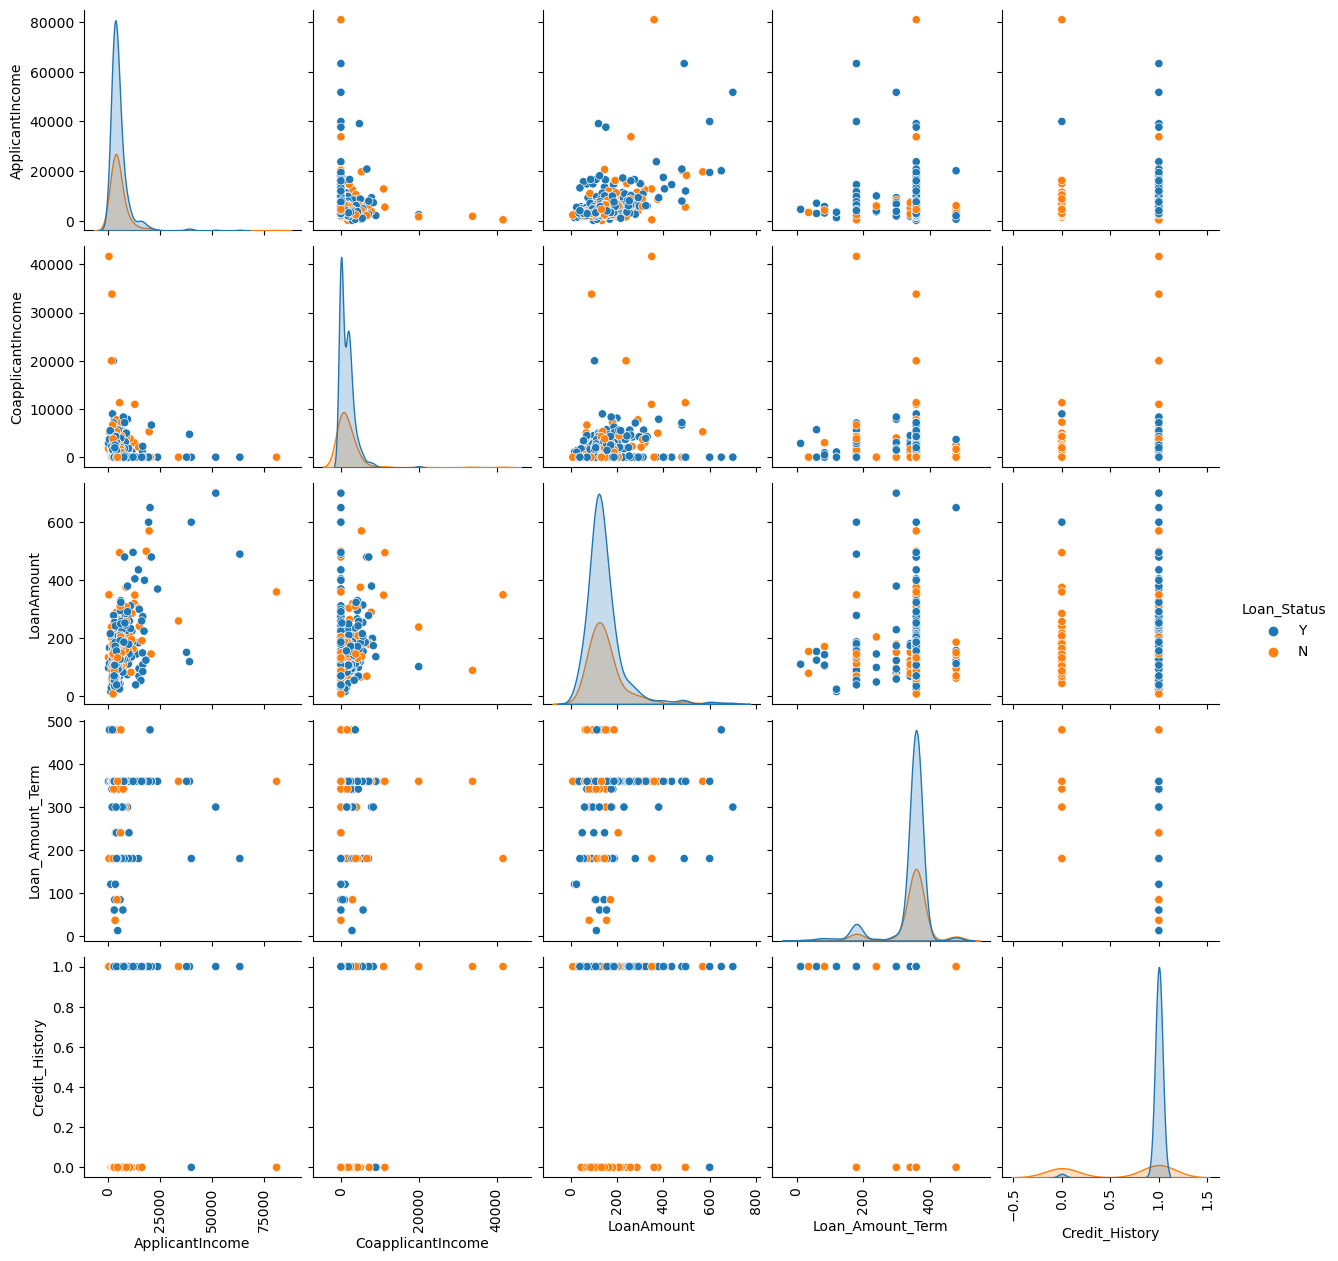

In [34]:
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

### Encoding

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df.replace({'Loan_Status':{'No':0,'Yes':1}},inplace=True)
df[ ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]=oe.fit_transform(df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [36]:
#checking if all the categorial data has changed into Numerical data
categorial_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorial_data.append(i)
print("categorial columns:",categorial_data)
print("\n")

Numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object":
        Numerical_data.append(i)
print("Numerical columns:",Numerical_data)
print("\n")
print("No.of Numerical column:")
print(len(Numerical_data))


categorial columns: []


Numerical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


No.of Numerical column:
13


In [37]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

all changed

### Correlation

In [38]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<AxesSubplot:>

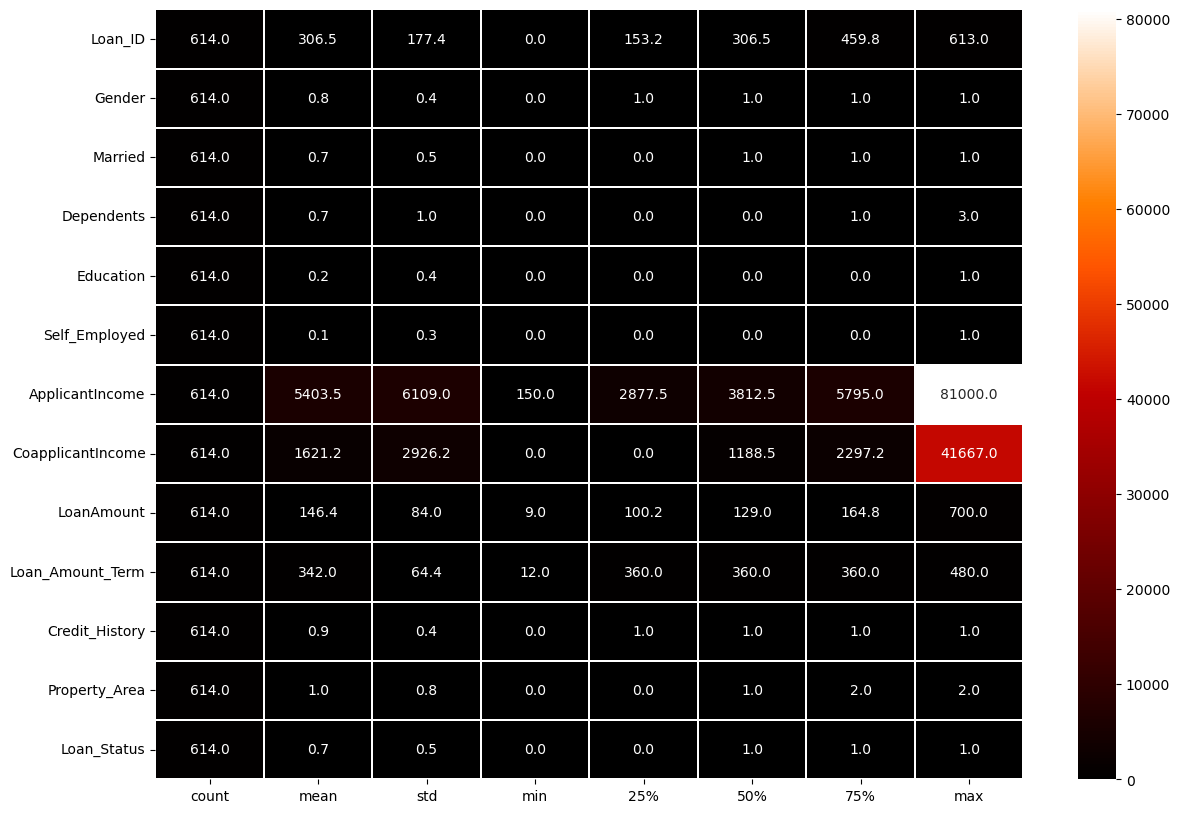

In [39]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().T,linewidth=0.3,fmt='0.1f' ,annot=True,cmap='gist_heat')

heatmap highlights that ,"Applicant income, co applicant income" column need feature scaling because of skewness,outliers are there

## Visualizing the correlation matrix by plotting heat map.

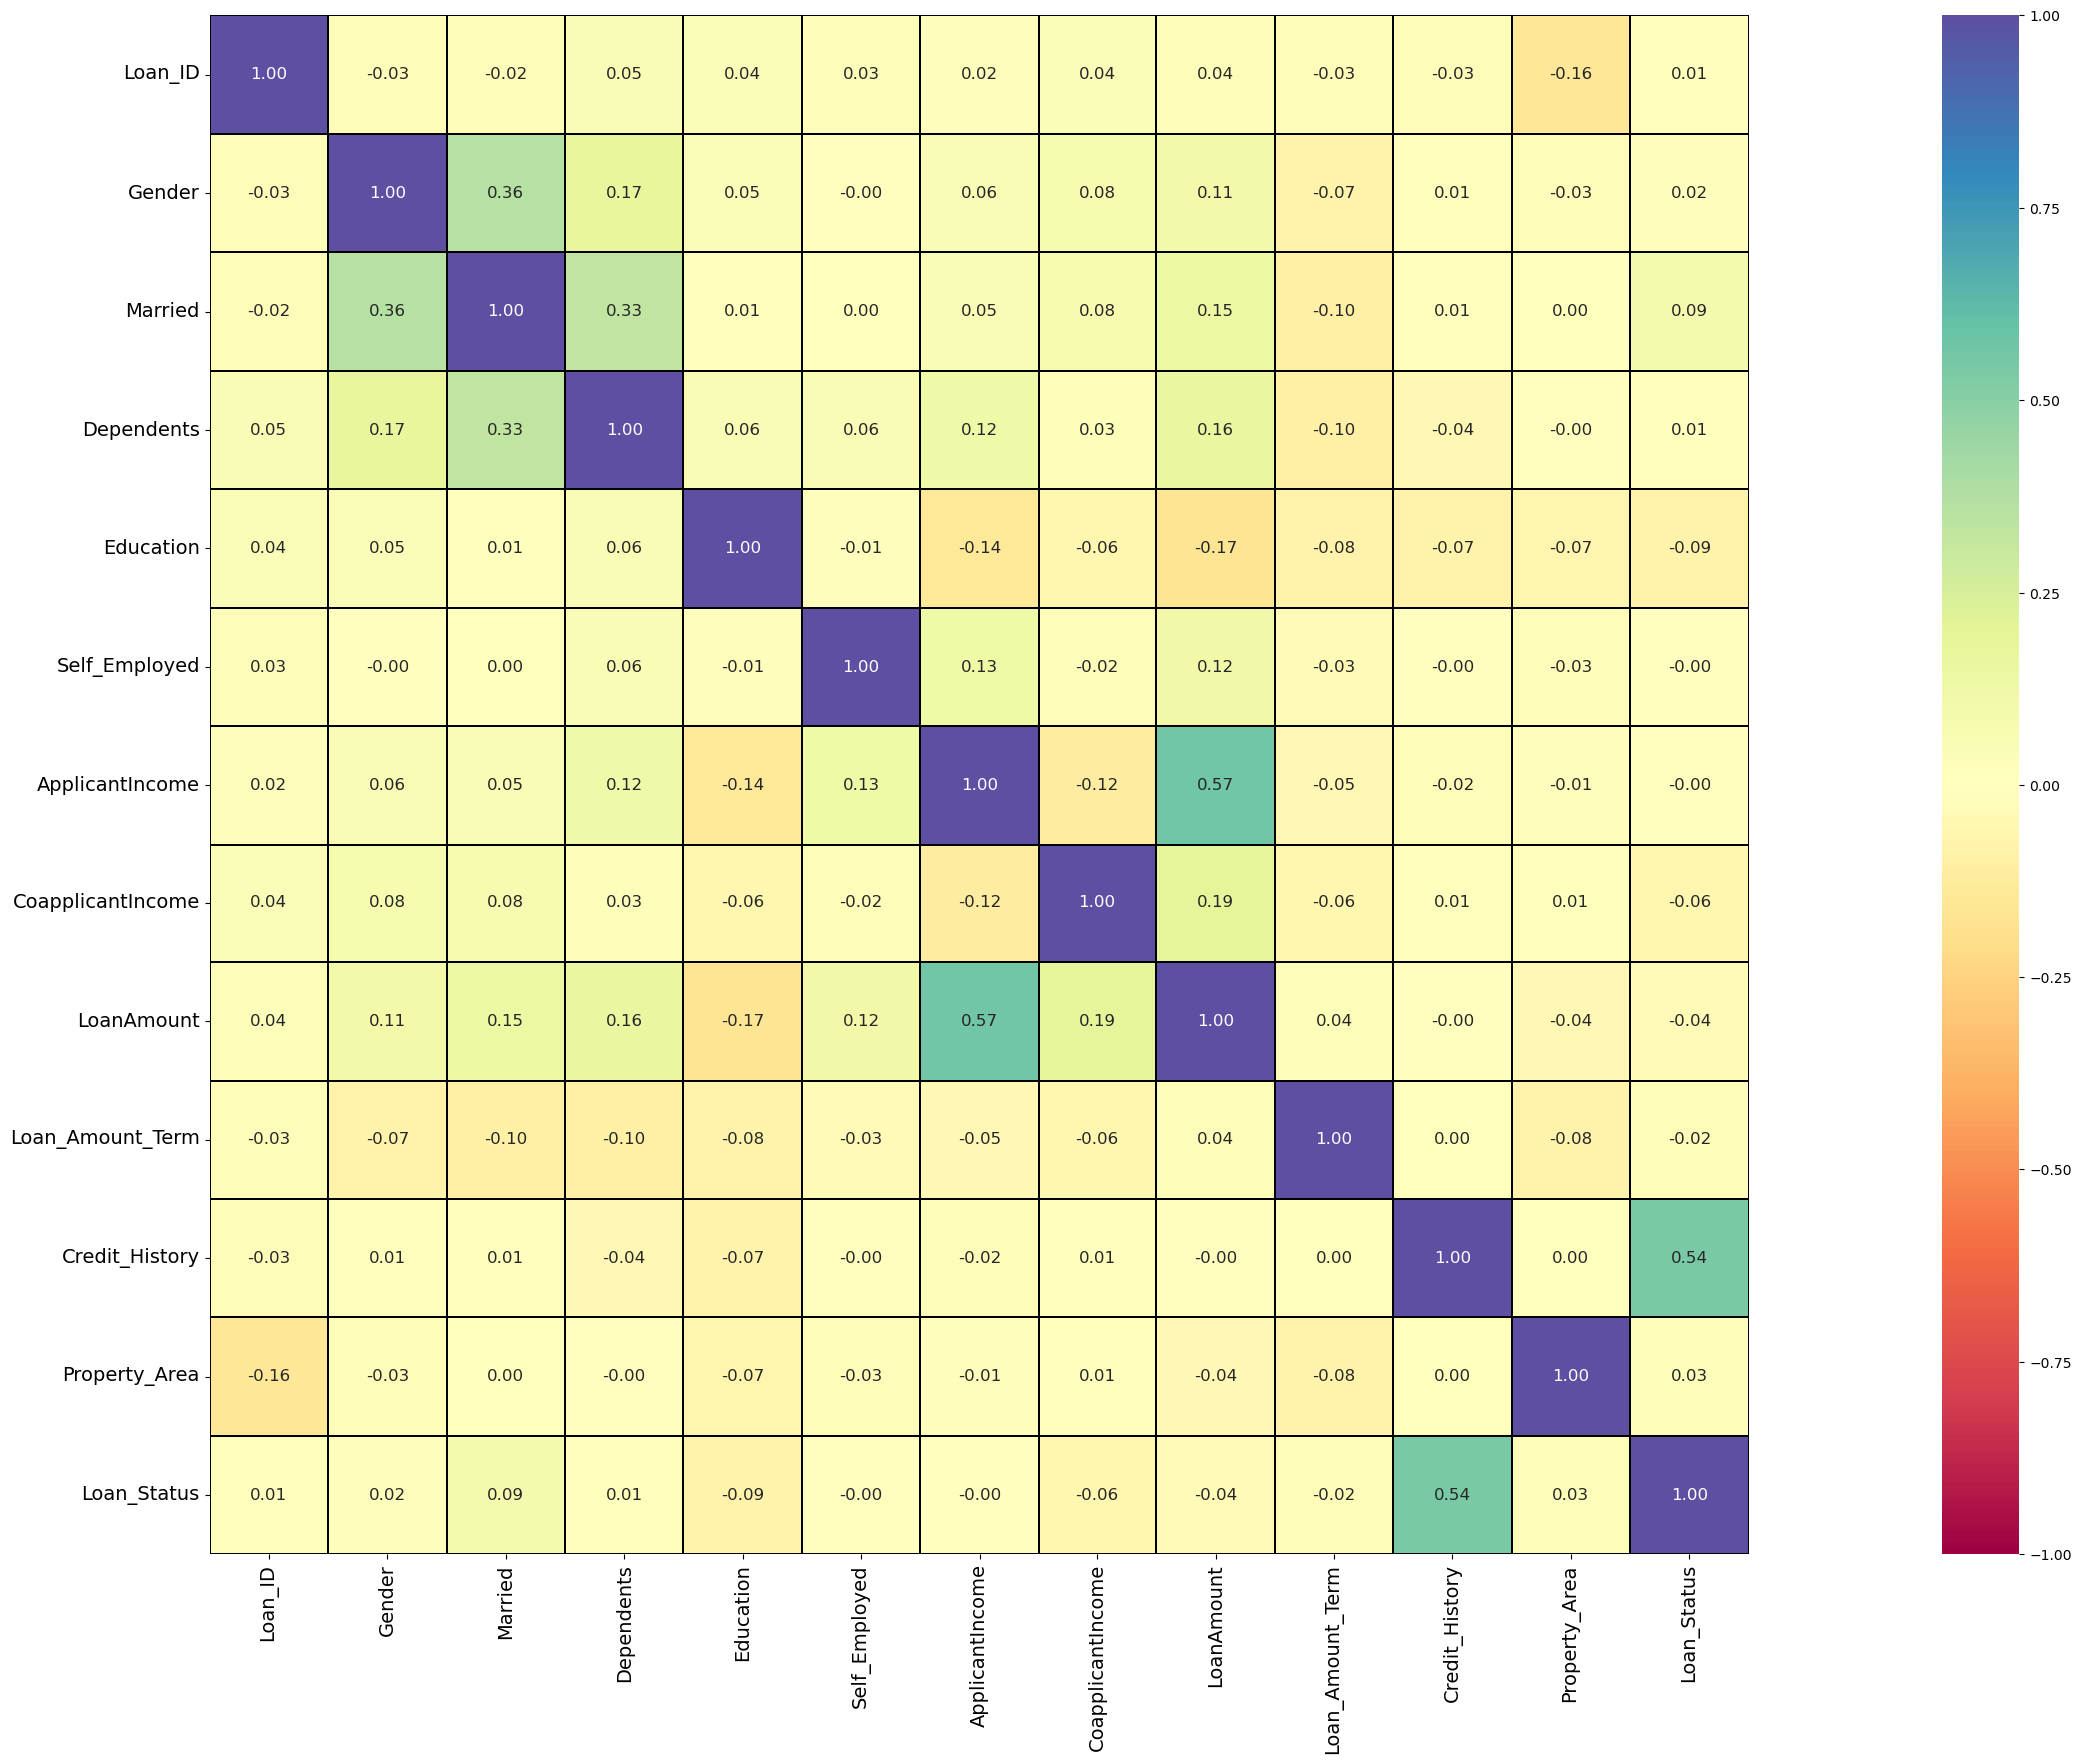

In [40]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':12}, cmap="Spectral")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

correlation between LoanStatus and Credit_history is there

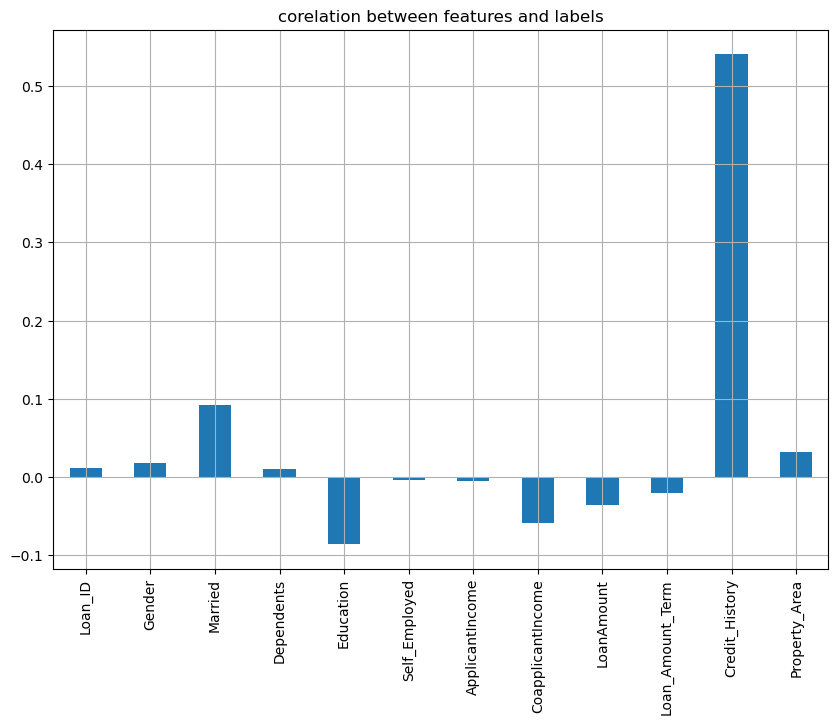

In [41]:
# Correlation between features and label:

# Replacing attrition column values:
df['Loan_Status'].replace(['Yes','No'],[1,0],inplace=True)

df.drop(columns = 'Loan_Status',axis = 1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

Credit history is getting high

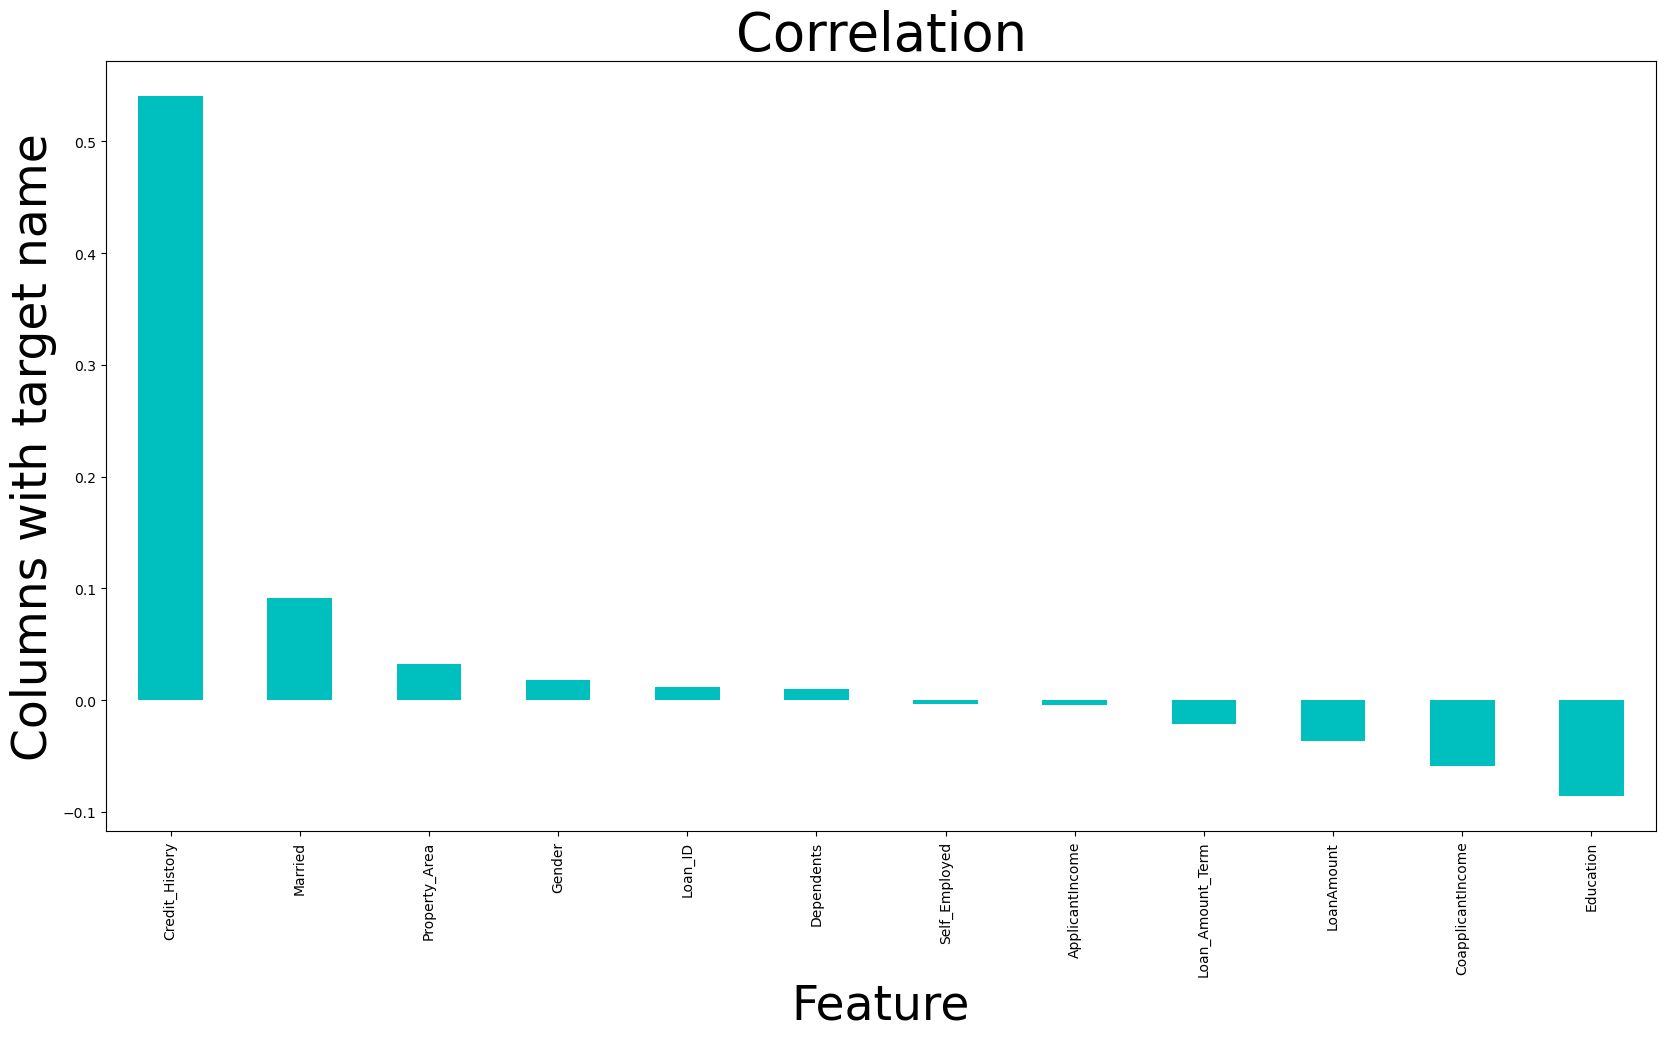

In [42]:
plt.figure(figsize=(20,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=34)
plt.ylabel('Columns with target name', fontsize=34)
plt.title('Correlation',fontsize=38)
plt.show()

From above Plotting we can see features from Loan amount to Education are negatively correlated.

# Checking outliers

### Checking for outliers using boxplot of univariate analysis

Loan_ID                 AxesSubplot(0.125,0.839474;0.352273x0.0405263)
Gender               AxesSubplot(0.547727,0.839474;0.352273x0.0405263)
Married                 AxesSubplot(0.125,0.790842;0.352273x0.0405263)
Dependents           AxesSubplot(0.547727,0.790842;0.352273x0.0405263)
Education               AxesSubplot(0.125,0.742211;0.352273x0.0405263)
Self_Employed        AxesSubplot(0.547727,0.742211;0.352273x0.0405263)
ApplicantIncome         AxesSubplot(0.125,0.693579;0.352273x0.0405263)
CoapplicantIncome    AxesSubplot(0.547727,0.693579;0.352273x0.0405263)
LoanAmount              AxesSubplot(0.125,0.644947;0.352273x0.0405263)
Loan_Amount_Term     AxesSubplot(0.547727,0.644947;0.352273x0.0405263)
Credit_History          AxesSubplot(0.125,0.596316;0.352273x0.0405263)
Property_Area        AxesSubplot(0.547727,0.596316;0.352273x0.0405263)
Loan_Status             AxesSubplot(0.125,0.547684;0.352273x0.0405263)
dtype: object

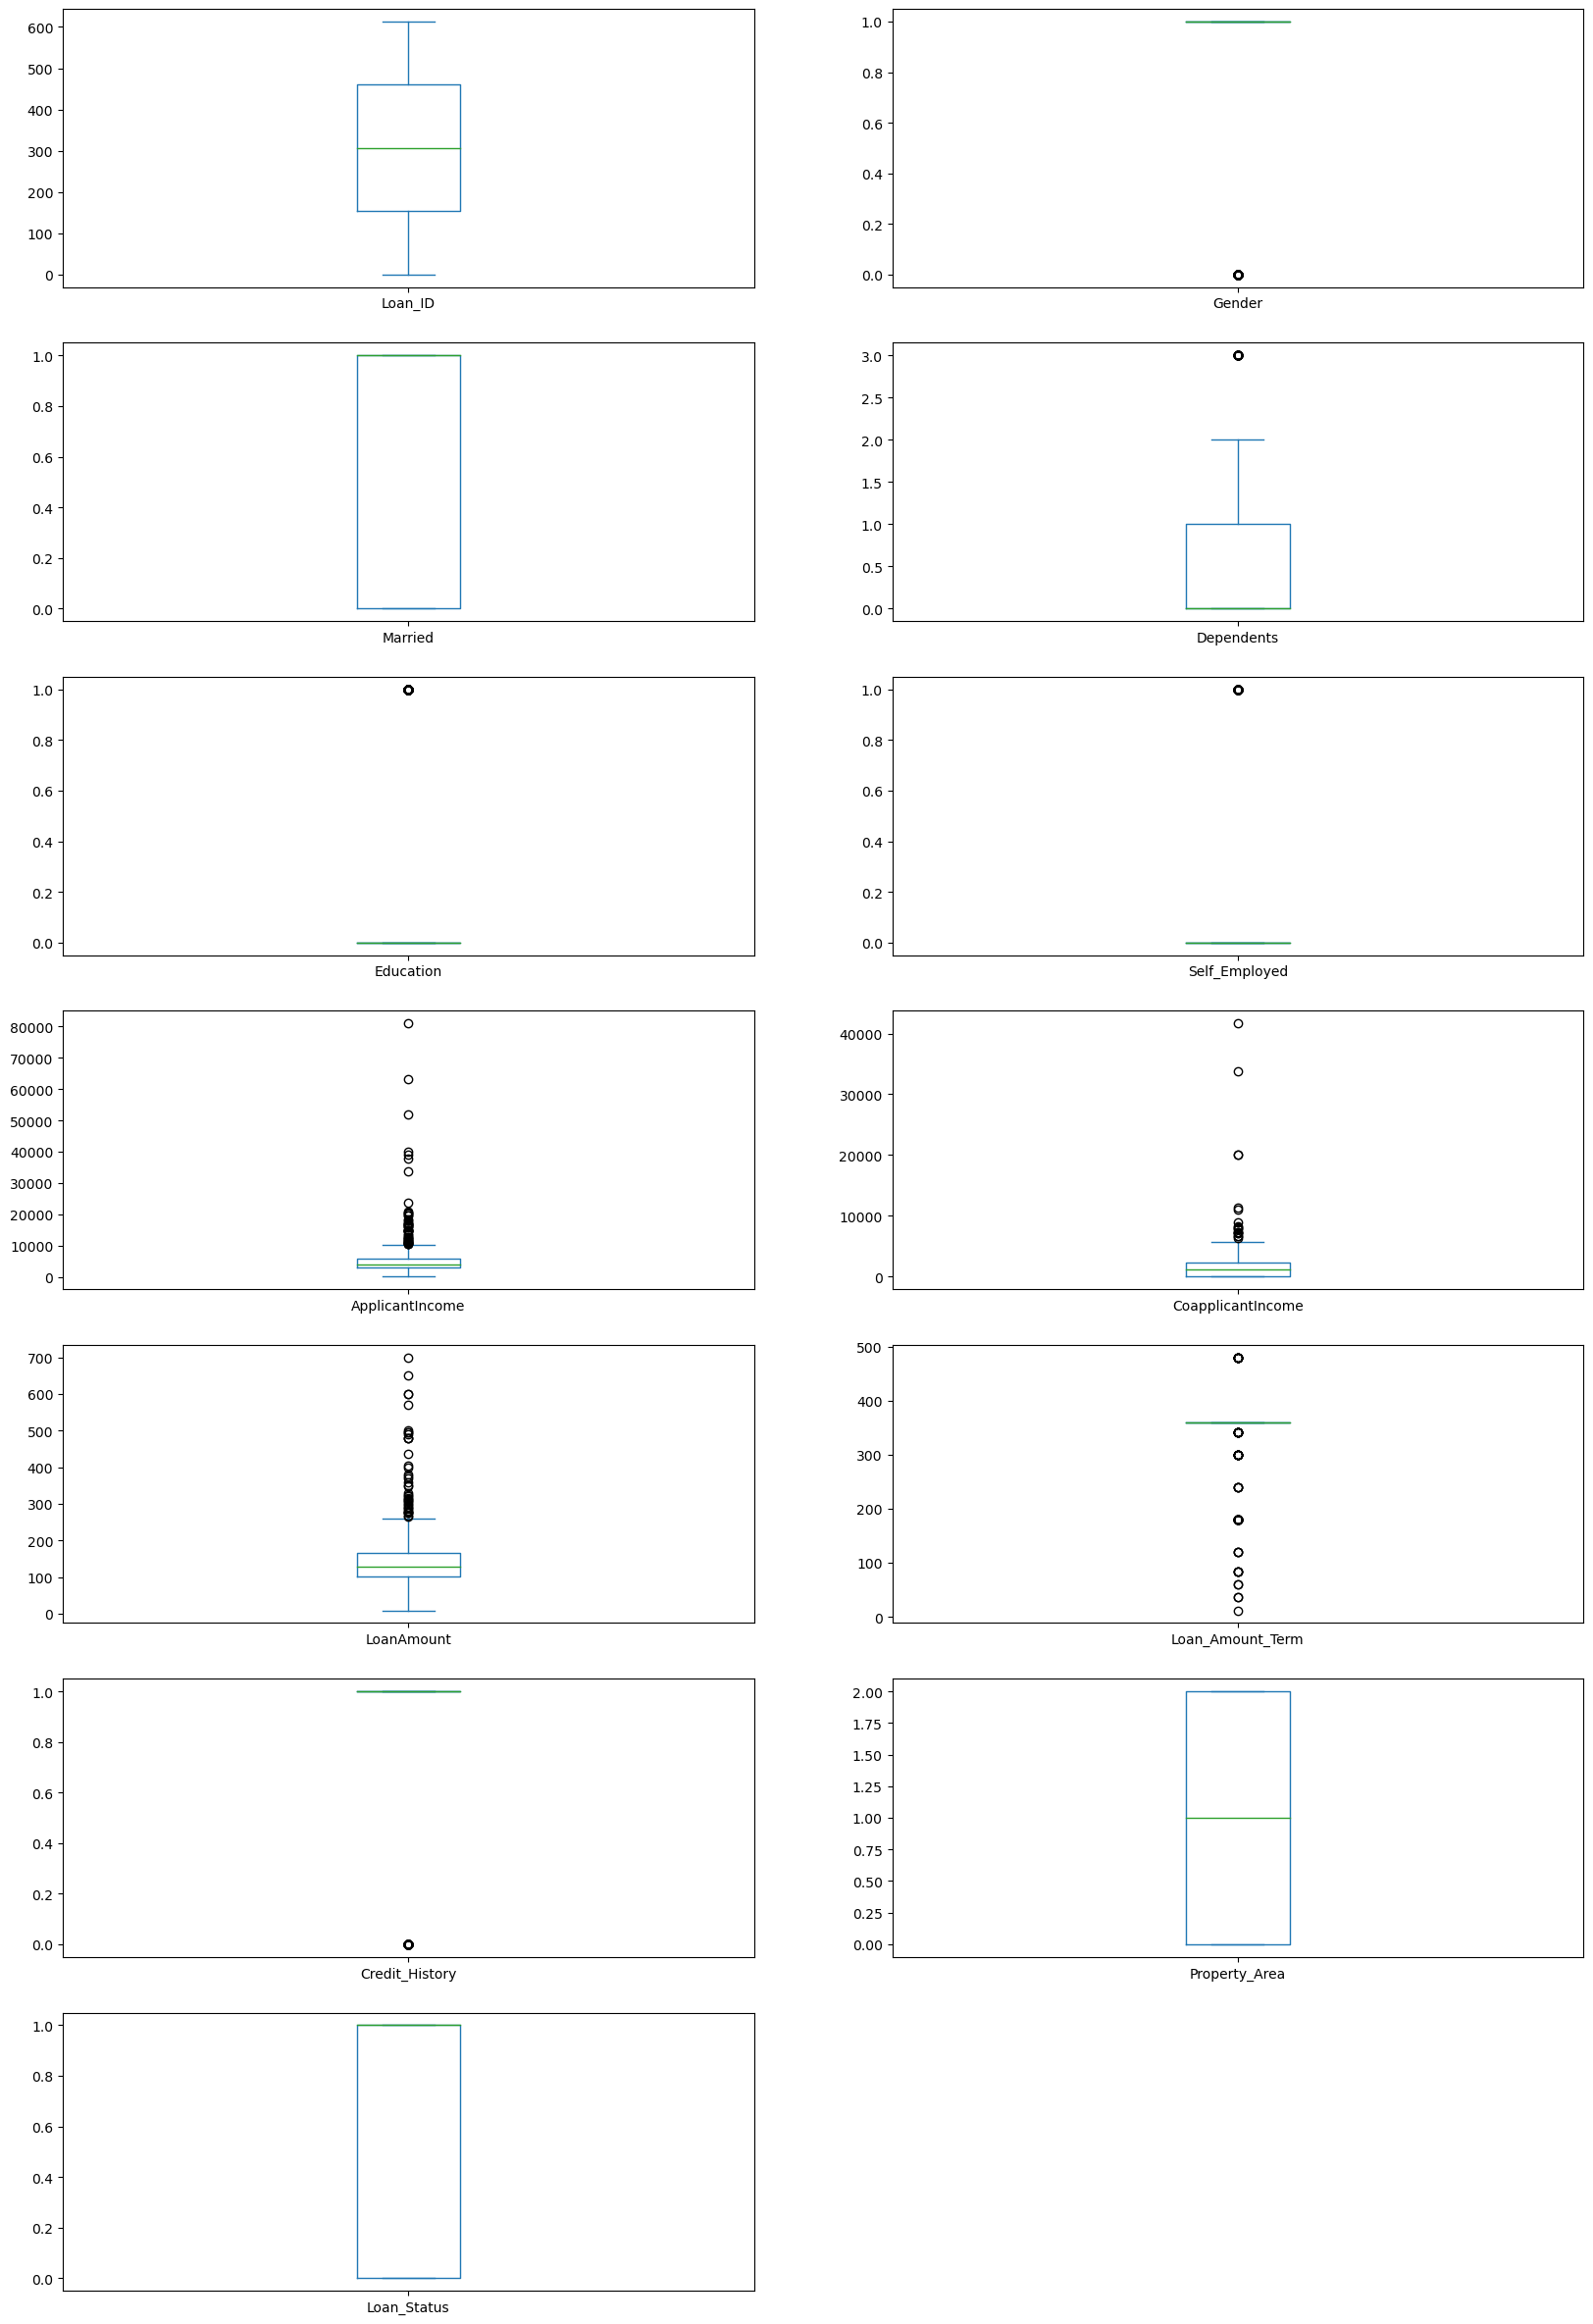

In [43]:
df.plot(kind='box',subplots=True,figsize=(20,70),layout=(16,2))

### Observation:
- Outliers present in columns: 'Gender', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 

- Outliers not present in columns: 'Married', 'Property_Area', 'Loan_Status',"loan_id"

The above boxplots represents that there are some outliers present there. so we will remove them before training our model

## Removing outliers using Zscore 

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers:",df.shape)
print ("Shape of the dataframe after removing outliers:",df1.shape)
print ("Data loss post outlier removal:",((df.shape[0]-df1.shape[0])/df.shape[0]*100),'%')

Shape of the dataframe before removing outliers: (614, 13)
Shape of the dataframe after removing outliers: (577, 13)
Data loss post outlier removal: 6.026058631921824 %


As the data loss is less than 10%, it is acceptable.

### Checking for skewness using distplot

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
Married             -0.630211
Property_Area       -0.055332
Loan_ID              0.010879
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
Self_Employed        2.252848
dtype: float64

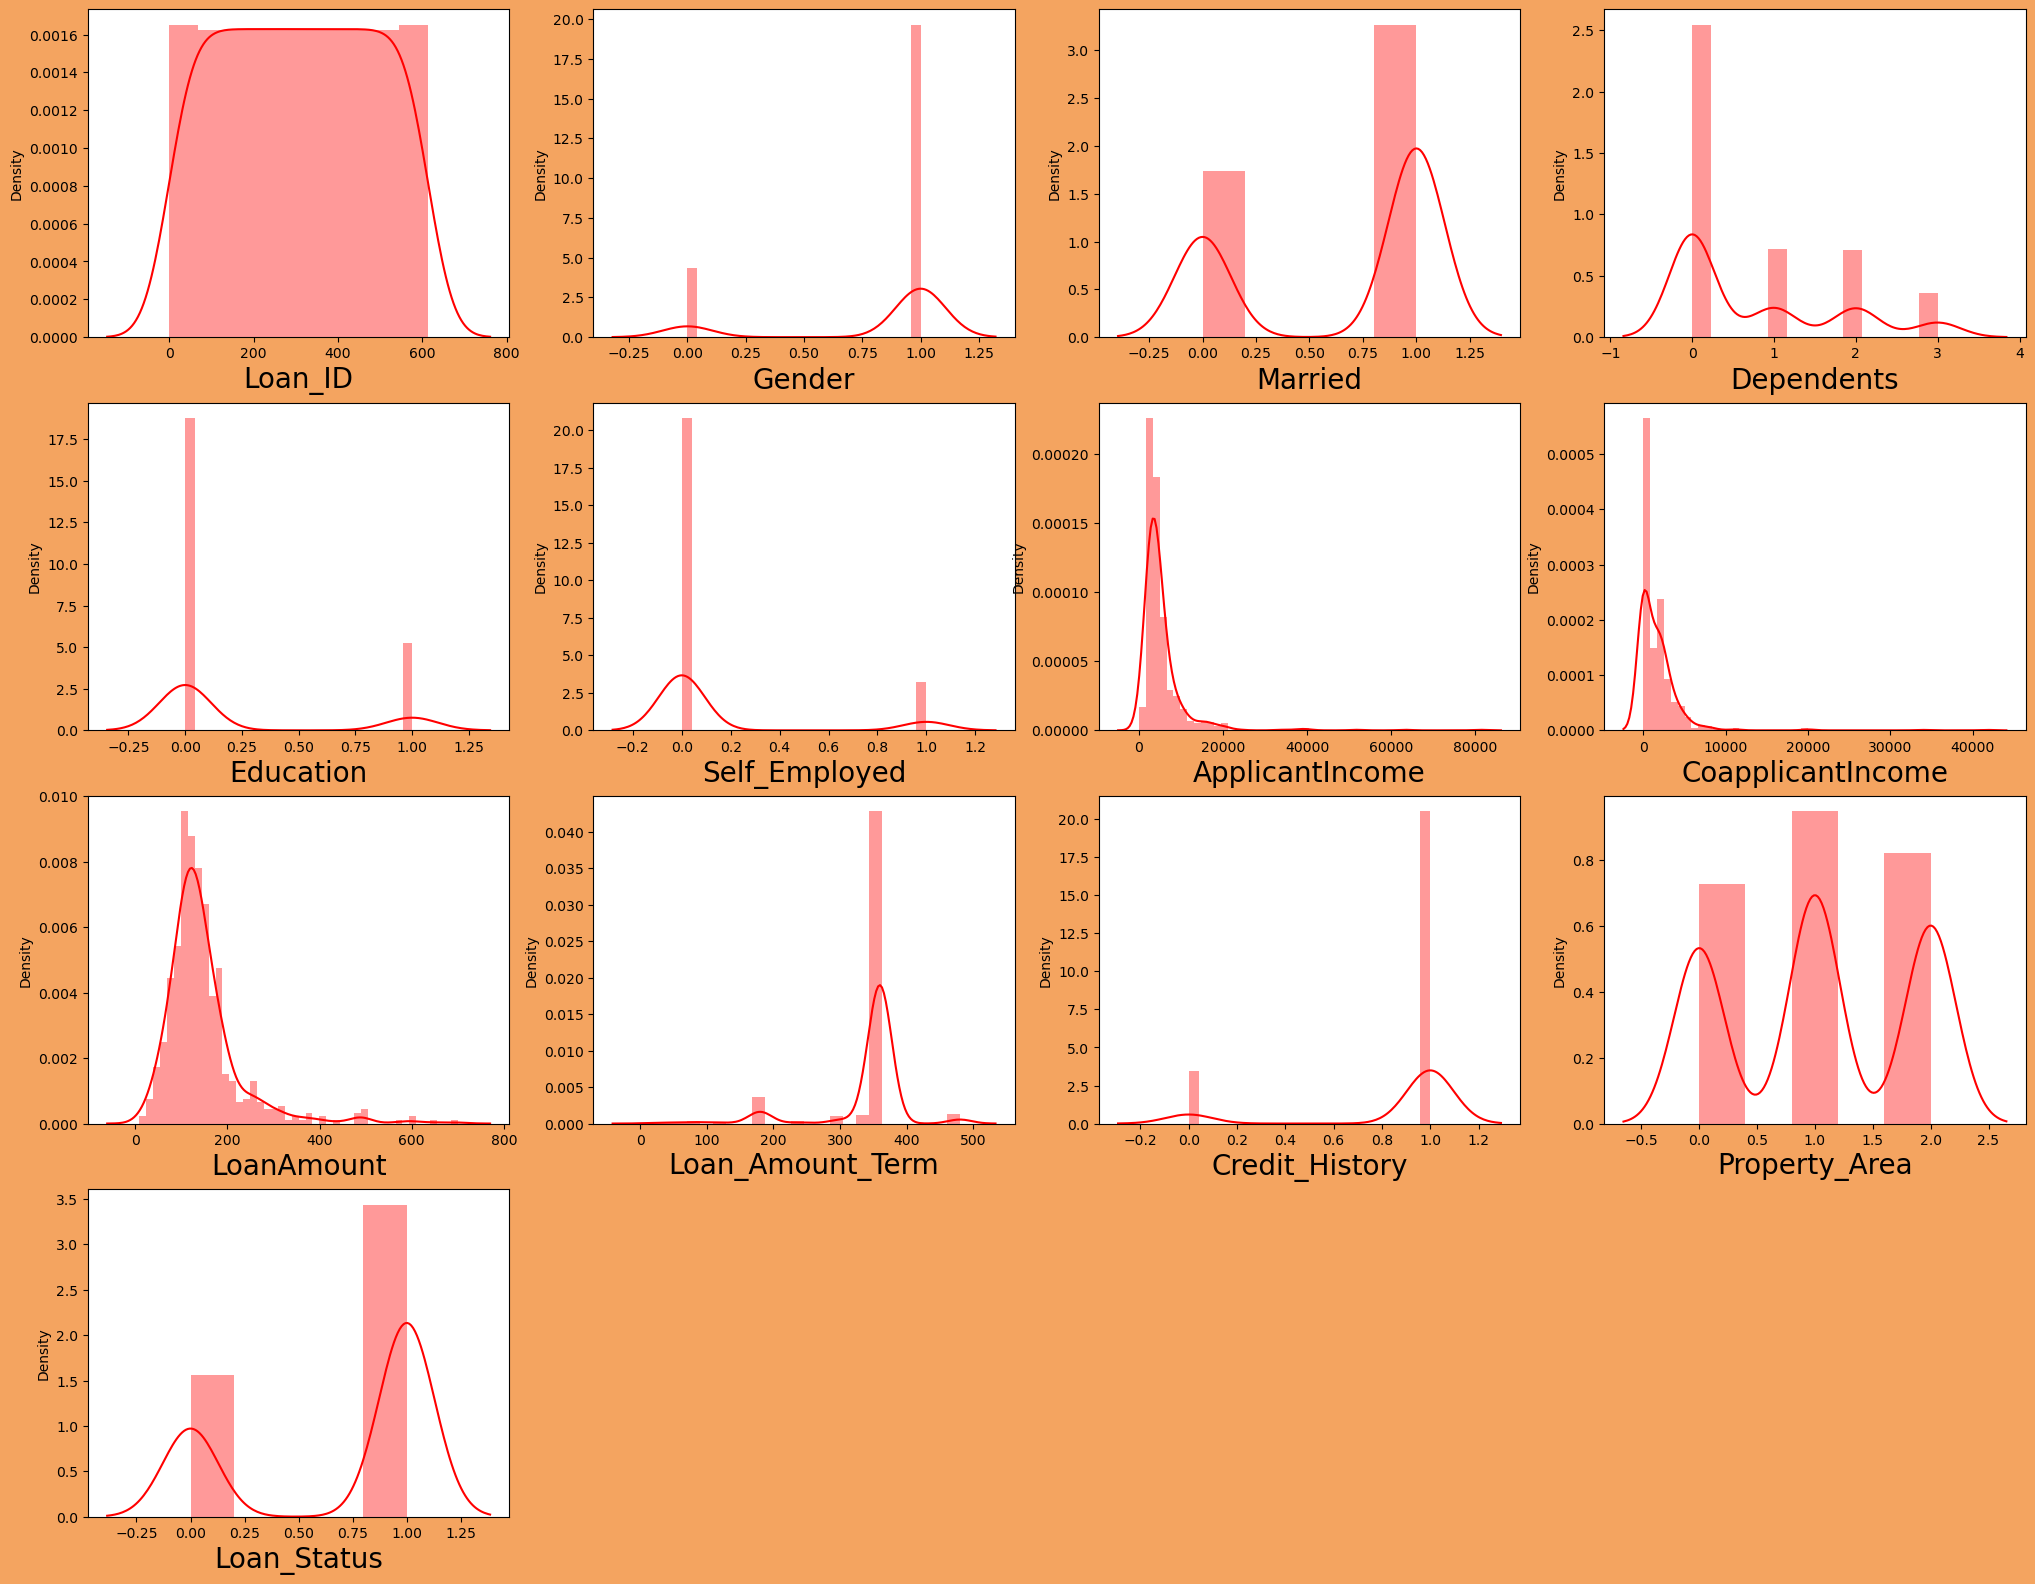

In [45]:
plt.figure(figsize=(25,40),facecolor='sandybrown')
pltno=1

for c in df:
    if pltno<=31:
        ax=plt.subplot(8,4,pltno)
        sns.distplot(df[c],color='r')
        plt.xlabel(c,fontsize=20)
        
    pltno+=1
df1.skew().sort_values()

From above distribution we can see that almost all the variables display a bell shaped curve and hence normaly distributed but in some columns there is skeness above the accepted range, so we will apply cuberoot formula to decrease it till it reaches inside the acceptance range

In [46]:
df1.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
Married             -0.630211
Property_Area       -0.055332
Loan_ID              0.010879
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
Self_Employed        2.252848
dtype: float64

### Removing Skewness

In [47]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [48]:
df1.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
LoanAmount          -0.697883
Married             -0.630211
CoapplicantIncome   -0.216757
ApplicantIncome     -0.204913
Property_Area       -0.055332
Loan_ID              0.010879
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
dtype: float64

### Observation:
- Skewness threshold taken is +/-1. 
- Columns which are having skewness: Gender, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.
- The Self_Employed column data is highly skewed
- All the columns are not normallly distributed, they are ske.wed
- Since Gender, Dependents, Education, Self_Employed are  categorical column so we will not remove skewness from them. Only we will remove skewness from ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History as these column contains continuous data.

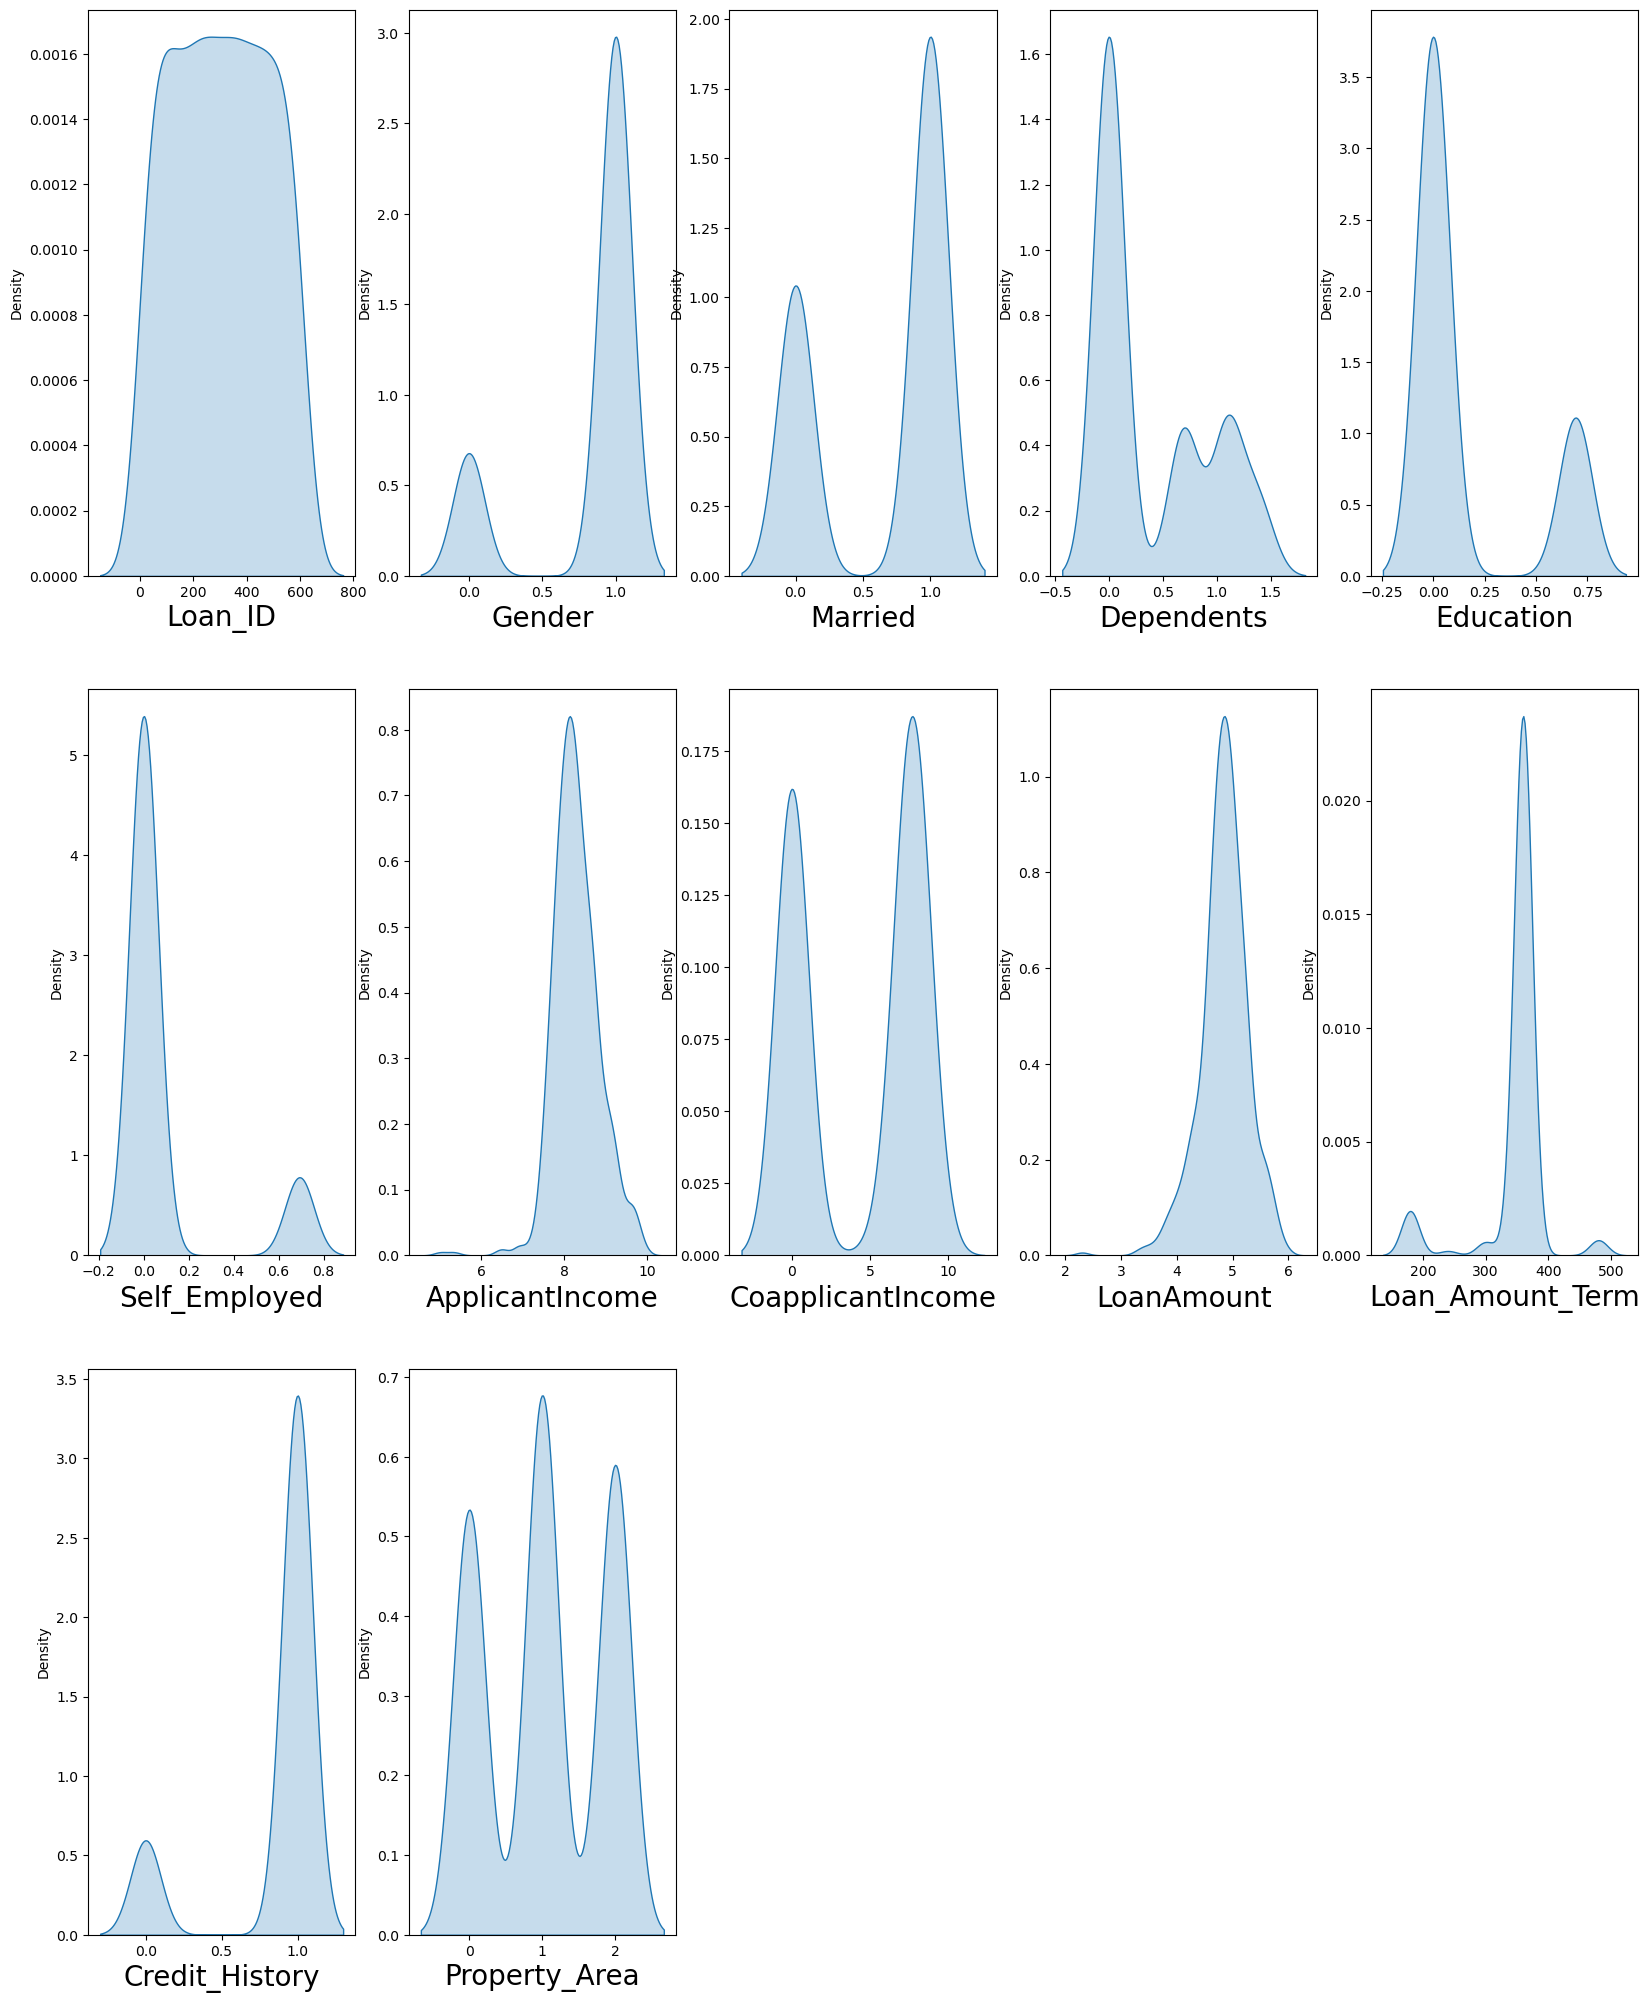

In [49]:
#checking the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df1.drop("Loan_Status", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df1[column], hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

## Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=df1.drop(['Loan_Status'],axis=1)
y=df1["Loan_Status"]

In [52]:
X=sc.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.722109,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.688861,-1.127469,0.369286,0.239408,0.418513,1.227472
1,-1.716445,0.477137,0.733939,0.573759,-0.541961,-0.380580,0.249082,0.780679,0.055093,0.239408,0.418513,-1.306522
2,-1.710782,0.477137,0.733939,-0.775143,-0.541961,2.627567,-0.514859,-1.127469,-1.487655,0.239408,0.418513,1.227472
3,-1.705118,0.477137,0.733939,-0.775143,1.845150,-0.380580,-0.784651,0.897159,-0.095673,0.239408,0.418513,1.227472
4,-1.699455,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.734818,-1.127469,0.281199,0.239408,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1.726889,-2.095835,-1.362511,-0.775143,-0.541961,-0.380580,-0.575974,-1.127469,-1.318164,0.239408,0.418513,-1.306522
573,1.732552,0.477137,0.733939,1.922662,-0.541961,-0.380580,0.050933,-1.127469,-2.644201,-3.237229,0.418513,-1.306522
574,1.738215,0.477137,0.733939,0.573759,-0.541961,-0.380580,1.269687,0.302441,1.650597,0.239408,0.418513,1.227472
575,1.743879,0.477137,0.733939,1.362817,-0.541961,-0.380580,1.157006,-1.127469,0.942022,0.239408,0.418513,1.227472


scaled data using standard scaler.

In [53]:
x.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.722109,0.477137,-1.362511,-0.775143,-0.541961,-0.380580,0.688861,-1.127469,0.369286,0.239408,0.418513,1.227472
1,-1.716445,0.477137,0.733939,0.573759,-0.541961,-0.380580,0.249082,0.780679,0.055093,0.239408,0.418513,-1.306522
2,-1.710782,0.477137,0.733939,-0.775143,-0.541961,2.627567,-0.514859,-1.127469,-1.487655,0.239408,0.418513,1.227472


In [54]:
y.head(3)

0    1.0
1    0.0
2    1.0
Name: Loan_Status, dtype: float64

In [55]:
x.shape, y.shape

((577, 12), (577,))

In [56]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Balancing the data using SMOTE 

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

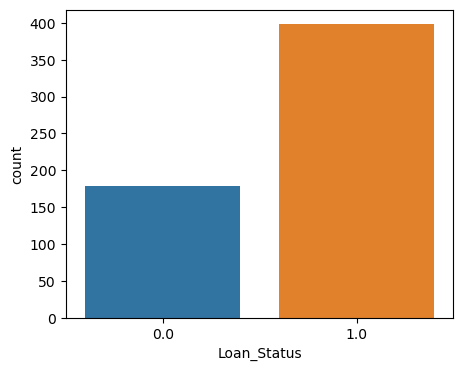

In [57]:
plt.figure(figsize=(5,4))
sns.countplot(x=df1['Loan_Status'])
df1['Loan_Status'].value_counts()

We can see that the data is imbalanced as values for 0 (no) is way more than 1 (yes). So we will use SMOTE to balance this.


In [58]:
from imblearn.over_sampling import SMOTE
f=df1.drop(['Loan_Status'],axis=1)
t=df1['Loan_Status']
smt=SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(f,t)
train_y.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

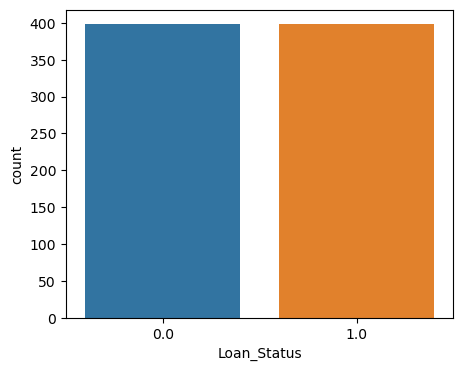

In [59]:
plt.figure(figsize=(5,4))
sns.countplot(x=train_y)
train_y.value_counts()

The data is now balanced

## Checking Multicollinearity using VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.040040,Loan_ID
1,1.223180,Gender
2,1.433887,Married
3,1.184374,Dependents
4,1.069309,Education
5,1.052253,Self_Employed
6,1.689367,ApplicantIncome
7,1.559714,CoapplicantIncome
8,1.487395,LoanAmount
9,1.058788,Loan_Amount_Term


From above we can see that all the VIF values are inside the acceptange range only which is 10. So we will not remove any columns and proceed with the data

## Finding the best random state

In [61]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC(),GradientBoostingClassifier()]

In [62]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8944723618090452 on Random State: 24


__At random state 42, we are getting best accuracy score i.e., 89.44%__

## Creating train-test-split

In [63]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [64]:
x.shape, y.shape

((577, 12), (577,))

In [65]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((403, 12), (403,), (174, 12), (174,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Models with their metrics

In [66]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,train_x,train_y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For GaussianNB()  Accuracy score is:  0.8505747126436781

 Confusion matrix: 
 [[ 26  25]
 [  1 122]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.51      0.67        51
         1.0       0.83      0.99      0.90       123

    accuracy                           0.85       174
   macro avg       0.90      0.75      0.79       174
weighted avg       0.87      0.85      0.83       174

Cross Validation Score= 0.7412735849056602 

*****************************************************************************
 For LogisticRegression()  Accuracy score is:  0.8505747126436781

 Confusion matrix: 
 [[ 26  25]
 [  1 122]]

 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.51      0.67        51
         1.0       0.83      0.99      0.90       123

    accuracy                           0.85       174
   macro avg       0.90      0.75      0.79       174
weighted a

We see from above that RandomForestClassifier()  Accuracy score is:  86.20 working the best, so we will use hyperparameter tuning on it


In [74]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.7764852209540533 
The accuracy score is:  0.8505747126436781


## Hyperparameter Tuning

In [76]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto'}

In [77]:
final_model=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=10)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.0574712643678


## Visualising ROC curve

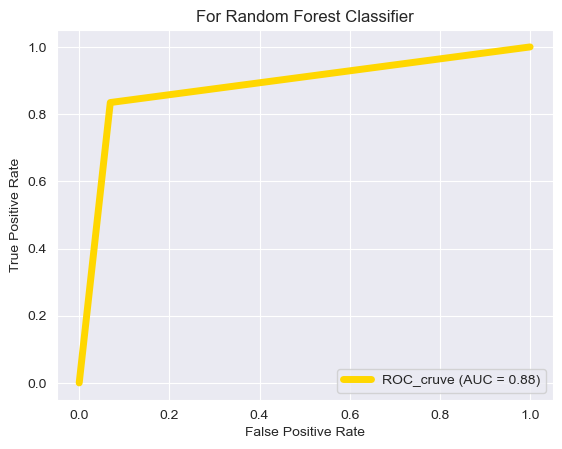

In [78]:
sns.set_style('darkgrid')
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='gold')
plt.title('For Random Forest Classifier')
plt.show()

since the model without outliers performing well we will select that dataframe

### Saving the model

In [79]:
import joblib
joblib.dump(final_model,"Loan_Status_Prediction.pkl")

['Loan_Status_Prediction.pkl']

In [80]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))

In [81]:
df_com

,original,predicted
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
169,1.0,1.0
170,1.0,1.0
171,0.0,1.0
172,1.0,1.0


As we can see, predicted and original values matches almost same.

In [82]:
model =df_com.to_csv('Loan_Status_Prediction.csv')
model

## conclusion

#### after all the data has sent to train and test,the Attrition column  data has  predicted accurately sucessfully.

## --Thanks--